# Loading and normalizing images using TorchVision


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import CIFAR10
import random
import os
from PIL import Image
import numpy as np

In [8]:
# load dataset 
path_to_dataset = 'custom/custom_dataset/'
y = [5, 6, 7, 10, 4, 1, 8, 9, 2, 3]

In [9]:
def copypaste(cifar_img):

    cifar_size = (16, 16)
    inet_size = (32, 32)
    
    imagenet_path = '/Users/dweepa/Documents/CSCI566/BackgroundInvariance/data/tiny-imagenet-200/train/n01443537/images/'
    tiny_imagenet = random.choice(os.listdir(imagenet_path))
    image = Image.open(imagenet_path + tiny_imagenet)
#     print(image)

    
    image = image.resize(inet_size)
    cifar_img = cifar_img.resize(cifar_size)

    max_loc = inet_size[0] - cifar_size[0]
    x = random.randint(0, max_loc)
    y = random.randint(0, max_loc)

    x1, y1, x2, y2 = x, y, x + cifar_size[0], y + cifar_size[0]
    image.paste(cifar_img, (x1, y1, x2, y2)) #, mask = cif)

    return np.asarray(image)
    
# cifar = f'{path}/cifar_single_image.jpeg'
# cifar = Image.open(cifar)
# cifar = np.asarray(cifar)
# augmented = copypaste(cifar)

In [18]:
transform = transforms.Compose([
    copypaste,
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [19]:
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=6, shuffle=True, num_workers=0)

testset = CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=6, shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [20]:
for a, b in trainloader:
    print(a,b)
    break

tensor([[[[-0.6000, -0.3255, -0.6078,  ..., -0.7569, -0.7647, -0.7725],
          [-0.5608, -0.5373, -0.7098,  ..., -0.7804, -0.8510, -0.8588],
          [-0.5373, -0.5765, -0.7725,  ..., -0.7725, -0.9059, -0.9216],
          ...,
          [-0.6627, -0.3020, -0.3725,  ..., -0.5451,  0.1373,  0.2157],
          [-0.7725, -0.4824, -0.5137,  ..., -0.3333,  0.0667,  0.1608],
          [-0.8902, -0.7255, -0.5843,  ..., -0.2078, -0.0667,  0.1059]],

         [[-0.6157, -0.3333, -0.6000,  ..., -0.8039, -0.8196, -0.8353],
          [-0.5765, -0.5451, -0.7020,  ..., -0.8196, -0.8667, -0.8588],
          [-0.5451, -0.5765, -0.7647,  ..., -0.7961, -0.8902, -0.8824],
          ...,
          [-0.3804,  0.2784,  0.2471,  ..., -0.6706, -0.0980, -0.1137],
          [-0.4667,  0.0667,  0.0980,  ..., -0.4275, -0.1216, -0.1216],
          [-0.5294, -0.2078,  0.0353,  ..., -0.2706, -0.2078, -0.1294]],

         [[-0.5216, -0.3020, -0.6471,  ..., -0.7490, -0.8275, -0.8902],
          [-0.4980, -0.5137, -

# Displaying some images

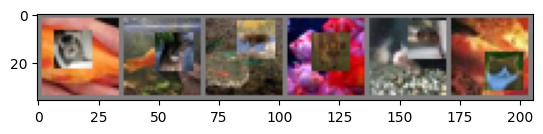

  cat   cat  deer  deer   cat   cat


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(6)))

# Defining a Convolutional Neural Network

In [22]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# Defining a Loss Function and optimizer
**We will use a classification Cross-Entropy loss and Stochastic Gradient Descent(SGD) with momentum**

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Finally we will train our neural network

In [24]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.302
[1,  4000] loss: 2.273
[1,  6000] loss: 2.178
[1,  8000] loss: 2.117
[2,  2000] loss: 2.049
[2,  4000] loss: 2.004
[2,  6000] loss: 1.982
[2,  8000] loss: 1.940
[3,  2000] loss: 1.924
[3,  4000] loss: 1.893
[3,  6000] loss: 1.875
[3,  8000] loss: 1.862
[4,  2000] loss: 1.824
[4,  4000] loss: 1.810
[4,  6000] loss: 1.809
[4,  8000] loss: 1.791
[5,  2000] loss: 1.784
[5,  4000] loss: 1.781
[5,  6000] loss: 1.767
[5,  8000] loss: 1.748
Finished Training


# Now we will save our model

In [26]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# Let's test the accuracy of the model

**Displaying an image from test set**

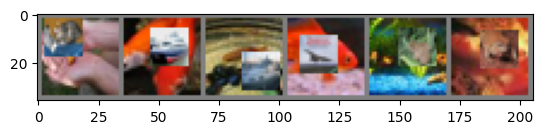

GroundTruth:    cat  ship  ship plane  frog  frog


In [29]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(6)))

**We will now see how the neural network predicts the above image**

In [30]:
outputs = net(images)

**The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:**

In [32]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(6)))

Predicted:   ship  ship  ship plane  deer  frog


**Let us look at how the network performs on the whole dataset.**

In [33]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 33 %


**Let's see which classes performed well individually**

In [34]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 34 %
Accuracy of   car : 47 %
Accuracy of  bird : 12 %
Accuracy of   cat : 30 %
Accuracy of  deer : 40 %
Accuracy of   dog : 32 %
Accuracy of  frog : 30 %
Accuracy of horse : 24 %
Accuracy of  ship : 46 %
Accuracy of truck : 24 %
